# Using hand histograms for keyboard cropping
This notebook tests the new idea for keyboard cropping. The idea is that over the duration of a video, the hands will cover the majority of the vertical height of the keyboard, and this information can be used to "reduce the search space" of the vertical cropping methods currently in place.

#### Steps:
* Perform hand detection on an entire video
* Save the y-coordinates of each hand landmark
* Plot a histogram of the y-coordinates
* Selects region of the histogram where the bins are greater than some threshold
* Plot the brightness curve only on this region

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

from hand_histogram import generate_channel_hist
import grid_utils
from grid_handler import channel_parameters, PianoGrid

objc[98479]: Class CaptureDelegate is implemented in both /Users/sam/upf/thesis/thesis-testing/mp_venv/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x159de2840) and /Users/sam/upf/thesis/thesis-testing/mp_venv/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x15b79c860). One of the two will be used. Which one is undefined.
objc[98479]: Class CVWindow is implemented in both /Users/sam/upf/thesis/thesis-testing/mp_venv/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x159de2890) and /Users/sam/upf/thesis/thesis-testing/mp_venv/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x156124a68). One of the two will be used. Which one is undefined.
objc[98479]: Class CVView is implemented in both /Users/sam/upf/thesis/thesis-testing/mp_venv/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x159de28b8) and /Users/sam/upf/thesis/thesis-testing/mp_venv/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x156124a90)

## TraumPiano

In [2]:
channel = 'TraumPiano'

traum_img = grid_utils.get_sample_frame(channel_parameters[channel])

output_name='hand_histograms/TraumPiano_hist.csv'

# Only run one of these lines

# traumpiano_df = generate_channel_hist(channel, output_name)
traumpiano_df = pd.read_csv(output_name)

In [3]:
traumpiano_df.head()

,column
0,0.975043
1,0.962310
2,0.912642
3,0.865595
4,0.821971


In [4]:
traum_img.shape

(720, 1280, 3)

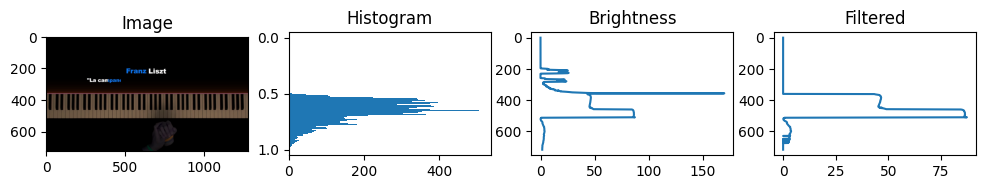

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 1.6))

ax1.imshow(traum_img)

traum_x = list(traumpiano_df["column"])
traum_n, traum_bins, _ = ax2.hist(traum_x, range=(0,1), bins=traum_img.shape[0], orientation='horizontal')
ax2.invert_yaxis()

y = range(traum_img.shape[0])
mean_brightness_per_row = [np.mean(traum_img[i, :,:]) for i in range(traum_img.shape[0])]
ax3.plot(mean_brightness_per_row, y)
ax3.invert_yaxis()

brightness_filtered = [mean_brightness_per_row[i] if traum_n[i] > 20 else 0 for i in range(len(mean_brightness_per_row))]
ax4.plot(brightness_filtered, y)
ax4.invert_yaxis()

ax1.set(title='Image')
ax2.set(title='Histogram')
ax3.set(title='Brightness')
ax4.set(title='Filtered')
plt.show()

Note to self: do I still want to use plateaus here, or instead measure by big jumps. But in that case, how do I choose the threshold for "big" jumps? Still not sure...

In [6]:
max(brightness_filtered)

87.40364583333333

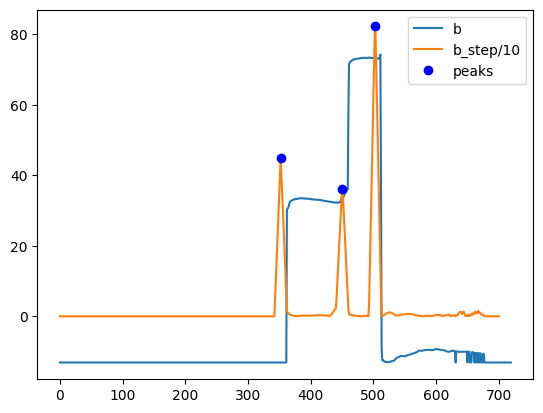

In [7]:
b = np.array([*map(float, brightness_filtered)])
b -= np.average(b)
step_arr = np.hstack((np.ones(10), -1*np.ones(10)))

b_step = np.absolute(np.convolve(b, step_arr, mode='valid'))

plt.plot(b, label='b')

plt.plot(b_step/10, label='b_step/10')

peaks = find_peaks(b_step, height=200, distance=50)[0]

plt.plot(peaks, b_step[peaks]/10, 'bo', label='peaks')

plt.legend()

# plt.plot((step_indx, step_indx), (dary_step[step_indx]/10, 0), 'r')

## AmiRRezA

In [8]:
channel = 'AmiRRezA'

amirreza_img = grid_utils.get_sample_frame(channel_parameters[channel])

output_name=f'hand_histograms/{channel}_hist.csv'

# Only run one of these lines

# amirreza_df = generate_channel_hist(channel, output_name)
amirreza_df = pd.read_csv(output_name)

In [9]:
amirreza_df.head()

,column
0,1.000717
1,0.967225
2,0.915957
3,0.865648
4,0.826194


In [10]:
amirreza_img.shape

(720, 1280, 3)

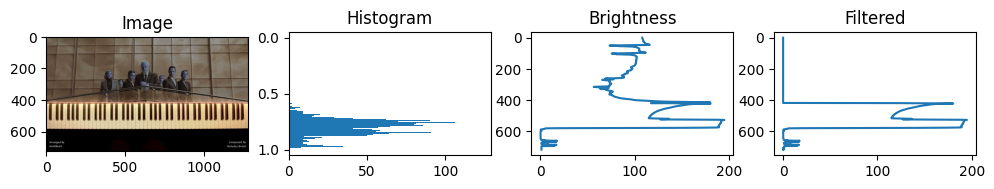

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 1.6))

ax1.imshow(amirreza_img)

amirreza_x = list(amirreza_df["column"])
amirreza_n, amirreza_bins, _ = ax2.hist(amirreza_x, range=(0,1), bins=amirreza_img.shape[0], orientation='horizontal')
ax2.invert_yaxis()

y = range(amirreza_img.shape[0])
mean_brightness_per_row = [np.mean(amirreza_img[i, :,:]) for i in range(amirreza_img.shape[0])]
ax3.plot(mean_brightness_per_row, y)
ax3.invert_yaxis()

brightness_filtered = [mean_brightness_per_row[i] if amirreza_n[i] > 0 else 0 for i in range(len(mean_brightness_per_row))]
ax4.plot(brightness_filtered, y)
ax4.invert_yaxis()

ax1.set(title='Image')
ax2.set(title='Histogram')
ax3.set(title='Brightness')
ax4.set(title='Filtered')
plt.show()

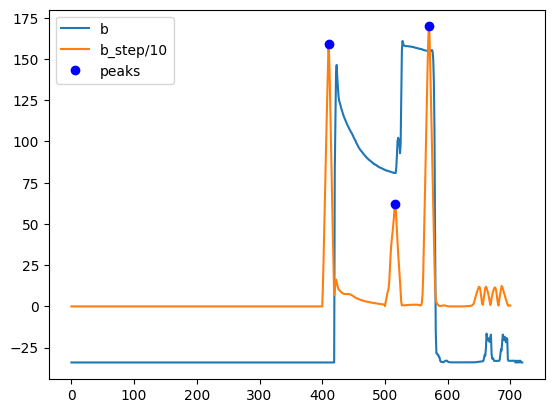

In [12]:
b = np.array([*map(float, brightness_filtered)])
b -= np.average(b)
step_arr = np.hstack((np.ones(10), -1*np.ones(10)))

b_step = np.absolute(np.convolve(b, step_arr, mode='valid'))

plt.plot(b, label='b')

plt.plot(b_step/10, label='b_step/10')

peaks = find_peaks(b_step, height=400, distance=50)[0]

plt.plot(peaks, b_step[peaks]/10, 'bo', label='peaks')

plt.legend()

## Rousseau

In [13]:
channel = 'Rousseau'

rousseau_img = grid_utils.get_sample_frame(channel_parameters[channel])

output_name=f'hand_histograms/{channel}_hist.csv'

# Only run one of these lines

# rousseau_df = generate_channel_hist(channel, output_name)
rousseau_df = pd.read_csv(output_name)

In [15]:
rousseau_df.head()

,column
0,0.889270
1,0.860281
2,0.810709
3,0.760225
4,0.719502


In [16]:
rousseau_img.shape

(720, 1280, 3)

347 663


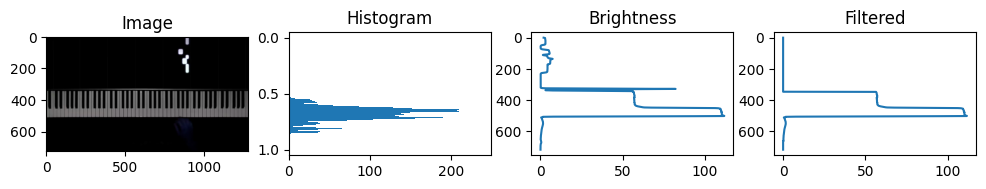

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 1.6))

ax1.imshow(rousseau_img)

rousseau_x = list(rousseau_df["column"])
rousseau_n, rousseau_bins, _ = ax2.hist(rousseau_x, range=(0,1), bins=rousseau_img.shape[0], orientation='horizontal')
ax2.invert_yaxis()

y = range(rousseau_img.shape[0])
mean_brightness_per_row = [np.mean(rousseau_img[i, :,:]) for i in range(rousseau_img.shape[0])]
ax3.plot(mean_brightness_per_row, y)
ax3.invert_yaxis()

buffer = 50

hist_start = next(x for x, val in enumerate(rousseau_n) if val > 20) - buffer
rousseau_n = np.flip(rousseau_n)
hist_end = len(rousseau_n) - next(x for x, val in enumerate(rousseau_n) if val > 20) + buffer

print(hist_start, hist_end)

brightness_filtered = [mean_brightness_per_row[i] if i > hist_start and i < hist_end else 0 for i in range(len(mean_brightness_per_row))]
# brightness_filtered = mean_brightness_per_row[hist_start:hist_end]
# y2 = range(hist_end - hist_start)
ax4.plot(brightness_filtered, y)
ax4.invert_yaxis()

ax1.set(title='Image')
ax2.set(title='Histogram')
ax3.set(title='Brightness')
ax4.set(title='Filtered')
plt.show()

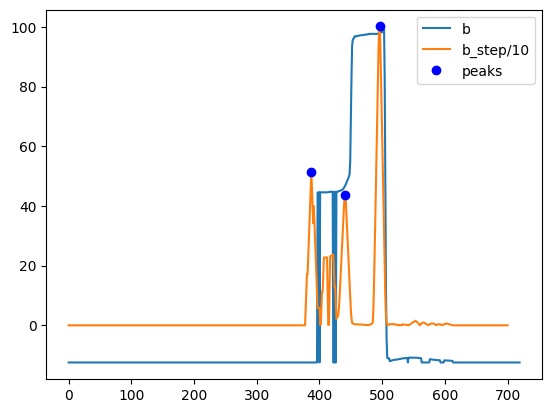

In [18]:
b = np.array([*map(float, brightness_filtered)])
b -= np.average(b)
step_arr = np.hstack((np.ones(10), -1*np.ones(10)))

b_step = np.absolute(np.convolve(b, step_arr, mode='valid'))

plt.plot(b, label='b')

plt.plot(b_step/10, label='b_step/10')

peaks = find_peaks(b_step, height=400, distance=50)[0]

plt.plot(peaks, b_step[peaks]/10, 'bo', label='peaks')

plt.legend()